**Comparative analysis of detection of email spam**

v1 = Label

v2 = Content

Steps:

1. Import libraries and load data

2. Pre-process of email content

3. Feature extraction and selection

4. Create training and testing data

5. KNN, SVM and logistic regression implementation

    5.1. KNN

    5.2. SVM

    5.3. Logistics Regression

6. Performance analysis

    6.1. KNN

    6.2. SVM

    6.3. Logistics Regression

7. Conlusion

---



# **1. Import libraries and load data**

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/1. Data Science/17. quiz machine learning techniques for spam detection in email/spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# check dataframe dimension
df.shape

(5572, 5)

*There are 5,552 rows and 5 columns.*

---



In [ ]:
# check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


*Unnamed: 2, Unnamed: 3 and Unnamed: 4 columns have so many NaN values. So we will drop them.*

---



In [ ]:
# drop some columns
#df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
# check columns again
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

*We now have only v1 (ham or spam) and v2 (email content) columns left.*

---



# **2. Pre-processing of email content**

In [ ]:
# check the content of email
df['v2'].tail()

5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, dtype: object

*Perform tokenization of email content.*

---



In [ ]:
# tokenize the words
def tokenize(text):
    return nltk.word_tokenize(str(text))

words = []

for i in df['v2']:
    words.append(tokenize(i))

In [ ]:
# show the list of words
words

[['Go',
  'until',
  'jurong',
  'point',
  ',',
  'crazy',
  '..',
  'Available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  '...',
  'Cine',
  'there',
  'got',
  'amore',
  'wat',
  '...'],
 ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...'],
 ['Free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  '.',
  'Text',
  'FA',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question',
  '(',
  'std',
  'txt',
  'rate',
  ')',
  'T',
  '&',
  'C',
  "'s",
  'apply',
  '08452810075over18',
  "'s"],
 ['U',
  'dun',
  'say',
  'so',
  'early',
  'hor',
  '...',
  'U',
  'c',
  'already',
  'then',
  'say',
  '...'],
 ['Nah',
  'I',
  'do',
  "n't",
  'think',
  'he',
  'goes',
  'to',
  'usf',
  ',',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['FreeMsg',
  'Hey',
  'there',
  'darling',
  'it',
  "'s",
  'been',
  '3',
  'week',
  "'s"

In [ ]:
# show how many items it has
len(words)

5572

# **3. Feature extraction and selection**

*Since there are some stopwords and the words that are not in their stem forms, so we need to pre-process (remove and transform) them.*

---



In [ ]:
# check the stop words in English
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

*The aove is the stopwords we got from the word list.*

---



In [ ]:
# use the above stopwords to filter out the email content and get only the main content
filtered_sentence = []
new_words = []

for i in words:
    for j in i:
        if j not in stop_words:
            filtered_sentence.append(j)
    new_words.append(filtered_sentence)
    filtered_sentence = [] # make sure there will be no duplicate words from previous sentence

In [ ]:
# check new_words
new_words

[['Go',
  'jurong',
  'point',
  ',',
  'crazy',
  '..',
  'Available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  '...',
  'Cine',
  'got',
  'amore',
  'wat',
  '...'],
 ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...'],
 ['Free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  '.',
  'Text',
  'FA',
  '87121',
  'receive',
  'entry',
  'question',
  '(',
  'std',
  'txt',
  'rate',
  ')',
  'T',
  '&',
  'C',
  "'s",
  'apply',
  '08452810075over18',
  "'s"],
 ['U', 'dun', 'say', 'early', 'hor', '...', 'U', 'c', 'already', 'say', '...'],
 ['Nah', 'I', "n't", 'think', 'goes', 'usf', ',', 'lives', 'around', 'though'],
 ['FreeMsg',
  'Hey',
  'darling',
  "'s",
  '3',
  'week',
  "'s",
  'word',
  'back',
  '!',
  'I',
  "'d",
  'like',
  'fun',
  'still',
  '?',
  'Tb',
  'ok',
  '!',
  'XxX',
  'std',
  'chgs',
  'send',
  ',',
  'å£1.50',
  'rcv'],
 ['Even',
  'brother',
  'like',
  

In [ ]:
# add a new column named Tokens (new_words) to the dataframe
df['Tokens'] = pd.DataFrame({'Tokens': new_words})

In [ ]:
# show the new dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Tokens
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"[Go, jurong, point, ,, crazy, .., Available, b..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,"[U, dun, say, early, hor, ..., U, c, already, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"[Nah, I, n't, think, goes, usf, ,, lives, arou..."


In [ ]:
# create a document list for v1 and tokens
documents = []

for index, row in df.iterrows():
    token = row['Tokens']
    label = row['v1']
    documents.append((list(token), label))

random.seed(100)
random.shuffle(documents)

In [ ]:
# show documents
documents

[(['Just',
   'read',
   'I',
   'shame',
   'tell',
   'takes',
   'runs',
   'I',
   'blame',
   'u',
   '4',
   'ever',
   '!',
   '!',
   'Not',
   'really',
   '4',
   'ever',
   'long',
   'time'],
  'ham'),
 (['Are', 'coming', 'day', 'class', '.'], 'ham'),
 (['Anything', 'lor', 'go', 'go', 'lor', '...'], 'ham'),
 (['Hi',
   ',',
   'love',
   '!',
   'How',
   'goes',
   'day',
   '?',
   'Fuck',
   ',',
   'morning',
   'I',
   'woke',
   'dropped',
   'cell',
   'way',
   'stairs',
   'seems',
   'alright',
   '...',
   '*',
   'phews',
   '*',
   'I',
   'miss',
   '!'],
  'ham'),
 (['Only',
   'got',
   'message',
   ',',
   'ignoring',
   '.',
   'Yes',
   ',',
   '.',
   'Shopping'],
  'ham'),
 (['Yes',
   'obviously',
   ',',
   'eggs-pert',
   'potato',
   'head\x89Û_',
   'Speak',
   'soon',
   '!'],
  'ham'),
 (['Wylie',
   'update',
   ':',
   'weed',
   'dealer',
   'carlos',
   'went',
   'freedom',
   'class',
   'lunsford'],
  'ham'),
 (['Takin', 'shower', 'yeah',

# **4. Create training and testing data**

In [ ]:
# split train and test data
train, test = train_test_split(documents, test_size=.3, random_state=42)

In [ ]:
# X = feature
# y = target
X_train = [' '.join(i) for (i, j) in train]
X_test = [' '.join(i) for (i, j) in test]
y_train = [j for (i, j) in train]
y_test = [j for (i, j) in test]

*Text Vectorization*

---



In [ ]:
# use TfidVectorizer to convert the text data in X_train and X_test into a numerical format
tfidf_vec = TfidfVectorizer(min_df=10, token_pattern=r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train)
X_test_bow = tfidf_vec.transform(X_test)

In [ ]:
# show the dimension
print(X_train_bow.shape)
print(X_test_bow.shape)

(3900, 755)
(1672, 755)


# **5. KNN, SVM and LogisticRegression implementation**

## **5.1. KNN**

In [ ]:
# use KNN algorithm to classify the spam data
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_bow, y_train)
y_pred_KNN = neigh.predict(X_test_bow)
y_pred_proba_KNN = neigh.predict_proba(X_test_bow)

In [ ]:
# show the prediction for the test data
y_pred_KNN

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
# show the predicted probabilities for the test data
y_pred_proba_KNN

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## **5.2. SVM**

In [ ]:
# use SVM algorithm to classify the spam data
model_svm = svm.SVC(C=8.0, kernel='linear')
model_svm.fit(X_train_bow, y_train)

SVC(C=8.0, kernel='linear')

In [ ]:
# perform cross-validation on the SVM classifier
model_svm_acc = cross_val_score(
    estimator=model_svm,
    X=X_train_bow,
    y=y_train,
    cv=5,
    n_jobs=-1)

model_svm_acc

array([0.97307692, 0.97307692, 0.97820513, 0.97820513, 0.97820513])

*Not much different, so it is quite stable.*

---



In [ ]:
# predict the test data
y_pred_svm = model_svm.predict(X_test_bow)
y_pred_svm

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## **5.3. Logistics Regression**

In [ ]:
# use logistic regression to classify the spam data
model_lg = LogisticRegression()
model_lg.fit(X_train_bow, y_train)

LogisticRegression()

In [ ]:
# perform cross-validation on the SVM classifier
model_lg_acc = cross_val_score(
    estimator=model_lg,
    X=X_train_bow,
    y=y_train,
    cv=5,
    n_jobs=-1)

model_lg_acc

array([0.97307692, 0.96538462, 0.97307692, 0.97435897, 0.97307692])

In [ ]:
# predict the test data
y_pred_lg = model_lg.predict(X_test_bow)
y_pred_lg

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# **6. Performance analysis**

## **6.1. Classification report for KNN**

In [ ]:
# classification report for KNN
y_true = y_test
target_names = ['ham', 'spam']
print(classification_report(y_true, y_pred_KNN, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1465
        spam       0.99      0.54      0.70       207

    accuracy                           0.94      1672
   macro avg       0.97      0.77      0.83      1672
weighted avg       0.95      0.94      0.94      1672



In [ ]:
# creat confusion matrix of KNN
conf_mat_knn = confusion_matrix(y_true, y_pred_KNN)
conf_mat_knn

array([[1464,    1],
       [  95,  112]])

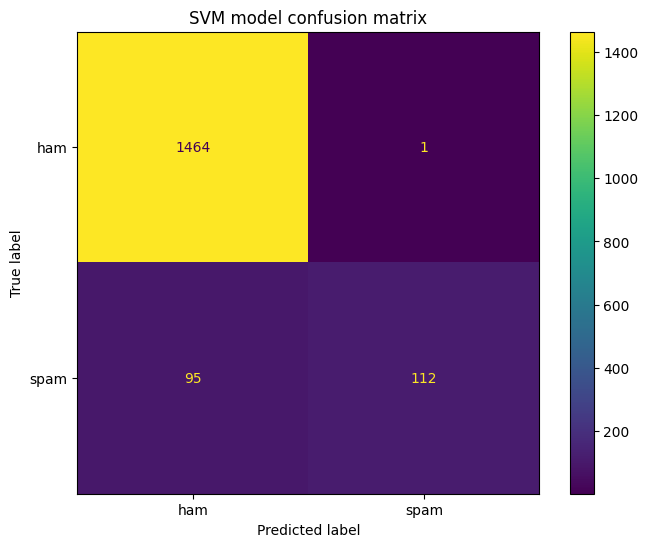

In [ ]:
# plot the heatmap of confusion matrix of SVM
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_mat_knn, display_labels=model_svm.classes_)
ax.set(title='SVM model confusion matrix')
display.plot(ax=ax)

*The KNN specified 1 email as a spam while it is not a spam and specified 95 emails as not a spam while it is actually a spam.*

---



## **6.2. Classification report for SVM**

In [ ]:
# get classification
y_true = y_test
target_names = ['ham', 'spam']
print(classification_report(y_true, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1465
        spam       0.94      0.91      0.93       207

    accuracy                           0.98      1672
   macro avg       0.96      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
# create a confusion matrix of SVM
conf_mat_svm = confusion_matrix(y_true, y_pred_svm)
conf_mat_svm

array([[1453,   12],
       [  18,  189]])

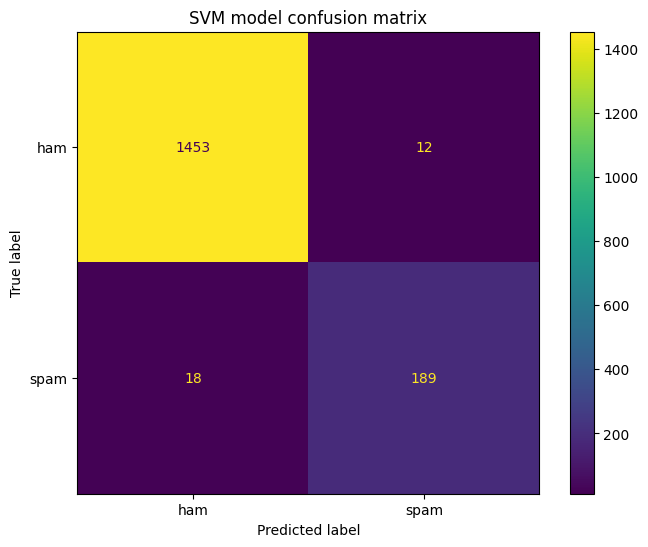

In [ ]:
# plot the heatmap of confusion matrix of SVM
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_mat_svm, display_labels=model_svm.classes_)
ax.set(title='SVM model confusion matrix')
display.plot(ax=ax)

*The SVM model specified 12 emails as a spam while it is not a spam and specified 18 emails as not a spam while it is actually a spam.*

---



## **6.3. Logistic Regression**

In [ ]:
# get classification
y_true = y_test
target_names = ['ham', 'spam']
print(classification_report(y_true, y_pred_lg, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1465
        spam       0.98      0.81      0.88       207

    accuracy                           0.97      1672
   macro avg       0.97      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
# create a confusion matrix of logistic regression
conf_mat_lg = confusion_matrix(y_true, y_pred_lg)
conf_mat_lg

array([[1461,    4],
       [  40,  167]])

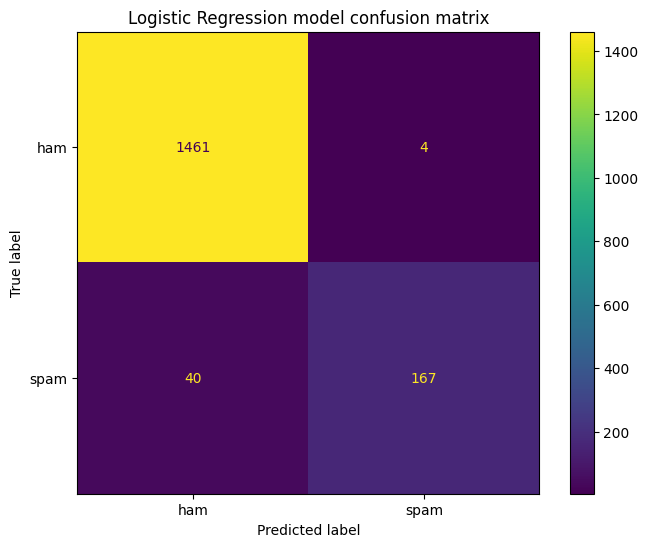

In [ ]:
# plot the heatmap of confusion matrix of logistic regression
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_mat_lg, display_labels=model_svm.classes_)
ax.set(title='Logistic Regression model confusion matrix')
display.plot(ax=ax)

*The logistic regression model specified 4 emails as a spam while it is not a spam and specified 40 emails as not a spam while it is actually a spam.*

---



# **7. Conclusion**

Q1. What model is the best? what data we need?

A1. SVM works best in my case because it made 30 mistakes while KNN made 96 mistakes and Logistic Regression made 44 mistakes. We need need data that is in the form that we can tokenize.

---



Q2. What steps can be taken to improve accuracy further?

A2. We can add more spam email to balance the dataset. We can also get rid of the puncutaions aside from stopwords.

---



Q3. Why did you use the k-NN algorithm for this problem? And why does kNN perform well in spam detection?

A3. K-NN algorithm works best in telling flase positive because it only incorreclty predicted 1 item. It performs well in spam detection because it classifies emails based on their similarity to known examples of spam and non-spam emails. If an incoming email is similar to known spam emails, it is classified as spam.

---

